In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\..'))
	print(os.getcwd())
except:
	pass


 # Tarea # 5
 ### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# ## Ejercicio # 1
# a) Cargar la tabla

In [2]:
#os.getcwd()
os.chdir(r'c:\\Users\\jmc\\Documents\\Ciencia de datos con Python\\ciencia-de-datos\\Unidad N. 5')
datos = pd.read_csv('datos\\Titanic.csv')

 b) Recodifique las variables cualitativas

In [3]:
def recodificar(col, nuevo_codigo):
  col_cod = pd.Series(col, copy=True)
  for llave, valor in nuevo_codigo.items():
    col_cod.replace(llave, valor, inplace=True)
  return col_cod

datos["Survived"] = recodificar(datos["Survived"], {0 : "Si", 1: "No"})

datos["Pclass"] = recodificar(datos["Pclass"], {1 : "primera", 2: "segunda", 3 : "tercera"})

print(datos.head())


   PassengerId Survived   Pclass  \
0            1       Si  tercera   
1            2       No  primera   
2            3       No  tercera   
3            4       No  primera   
4            5       Si  tercera   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


 c) Estadisticas basicas

 **Describe()**

In [4]:
datos.drop(columns="PassengerId", axis=1)
print(datos.dropna().describe())

       PassengerId         Age       SibSp       Parch        Fare
count   270.000000  270.000000  270.000000  270.000000  270.000000
mean    663.955556   36.825630    0.507407    0.477778   84.942193
std     371.875891   15.569971    0.643773    0.788784   80.698651
min       2.000000    0.920000    0.000000    0.000000    0.000000
25%     337.250000   25.000000    0.000000    0.000000   30.000000
50%     661.500000   36.000000    0.000000    0.000000   60.587500
75%     968.500000   48.000000    1.000000    1.000000  103.193750
max    1306.000000   80.000000    3.000000    4.000000  512.329200


 **Conteo de variables categoricas**

In [5]:
survived = pd.crosstab(index=datos["Survived"],columns="count")
pClass = pd.crosstab(index=datos["Pclass"],columns="count")
sex = pd.crosstab(index=datos["Sex"],columns="count")
embarked = pd.crosstab(index=datos["Embarked"],columns="count")

print(survived)
print("\n")
print(pClass)
print("\n")
print(sex)
print("\n")
print(embarked)


col_0     count
Survived       
No          492
Si          815


col_0    count
Pclass        
primera    321
segunda    277
tercera    709


col_0   count
Sex          
female    464
male      843


col_0     count
Embarked       
C           270
Q           123
S           914


 **Media de datos numericos**

In [6]:
print(datos.mean(numeric_only=True))

PassengerId    655.319816
Age             29.842596
SibSp            0.499617
Parch            0.385616
Fare            33.223956
dtype: float64


 **Mediana de datos numericos**

In [7]:
print(datos.median(numeric_only=True))

PassengerId    655.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


 **Desviacion Estandar de datos numericos**

In [8]:
print(datos.std(numeric_only=True))

PassengerId    377.922205
Age             14.390739
SibSp            1.042273
Parch            0.866092
Fare            51.765986
dtype: float64


 **Maximos de datos numericos**

In [9]:
print(datos.max(numeric_only=True))

PassengerId    1309.0000
Age              80.0000
SibSp             8.0000
Parch             9.0000
Fare            512.3292
dtype: float64


 **Percentiles de datos numericos**

In [10]:
print(datos.quantile(np.array([0,.25,.50,.75,1])))


      PassengerId    Age  SibSp  Parch      Fare
0.00          1.0   0.17    0.0    0.0    0.0000
0.25        328.5  21.00    0.0    0.0    7.8958
0.50        655.0  28.00    0.0    0.0   14.4542
0.75        982.5  39.00    1.0    0.0   31.2750
1.00       1309.0  80.00    8.0    9.0  512.3292


 d) Grafico de barras para determinar distribucion de variables categoricas
 **Survided**

([<matplotlib.axis.XTick at 0x1bd15aa4978>,
 <a list of 2 Text xticklabel objects>)

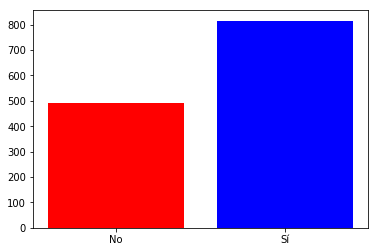

In [11]:
# Altura de la barra
alto = [survived['count'][0], survived['count'][1]]

# definicion de las barras
barras = ('No', 'Sí')

# Posicion de las barras en eje x
y_pos = np.arange(len(barras))

plt.bar(y_pos, alto, color=['red','blue'])
plt.xticks(y_pos, barras)


 **Passenger Class**

([<matplotlib.axis.XTick at 0x1bd172a8748>,
 <a list of 3 Text xticklabel objects>)

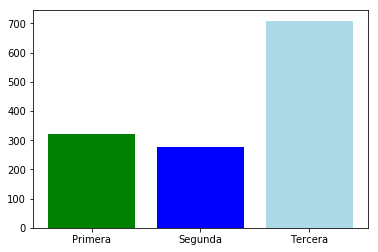

In [12]:
alto = [pClass['count'][0], pClass['count'][1], pClass['count'][2]]
barras = ('Primera', 'Segunda', 'Tercera')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['green', 'blue', 'lightblue'])
plt.xticks(y_pos, barras)


 **Sex**

([<matplotlib.axis.XTick at 0x1bd170377f0>,
 <a list of 2 Text xticklabel objects>)

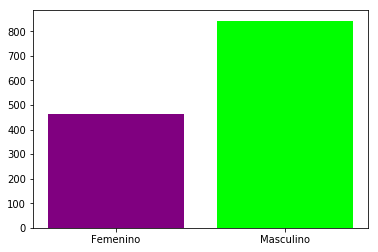

In [13]:
alto = [sex['count'][0], sex['count'][1]]
barras = ('Femenino', 'Masculino')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['purple', 'lime'])
plt.xticks(y_pos, barras)


 **Embarked Port**

([<matplotlib.axis.XTick at 0x1bd16ec6780>,
 <a list of 3 Text xticklabel objects>)

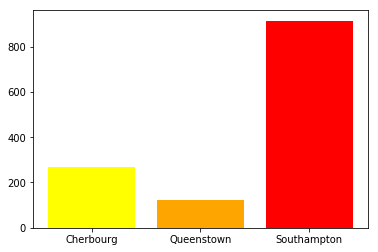

In [14]:
alto = [embarked['count'][0], embarked['count'][1], embarked['count'][2]]
barras = ('Cherbourg', 'Queenstown', 'Southampton')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['yellow', 'orange', 'red'])
plt.xticks(y_pos, barras)


 **Boxplot, datos atipicos**

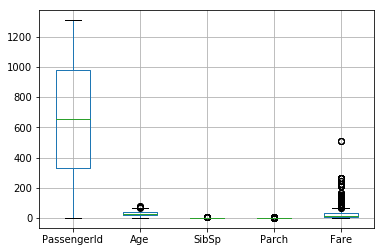

In [15]:
datos.head()
boxplots = datos.boxplot(return_type='axes')
